In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [4]:
df = pd.read_csv("heart.csv")

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.shape

(918, 12)

In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
data = df.drop(["ChestPainType","RestingECG","ExerciseAngina","ST_Slope"],axis =1)

In [12]:
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,M,140,289,0,172,0.0,0
1,49,F,160,180,0,156,1.0,1
2,37,M,130,283,0,98,0.0,0
3,48,F,138,214,0,108,1.5,1
4,54,M,150,195,0,122,0.0,0


<function matplotlib.pyplot.show(close=None, block=None)>

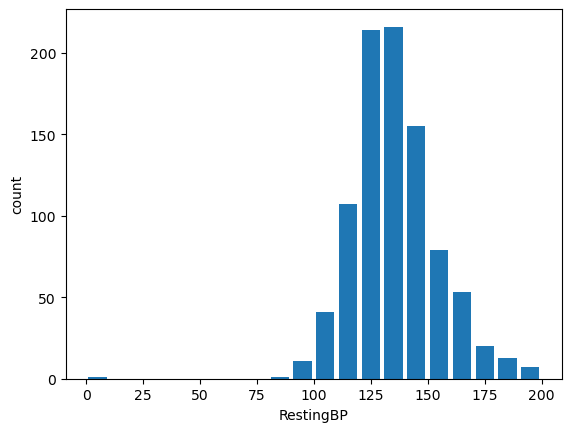

In [49]:
plt.hist(data.RestingBP,bins = 20,rwidth =0.8)
plt.xlabel("RestingBP")
plt.ylabel("count")
plt.show

In [15]:
data["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

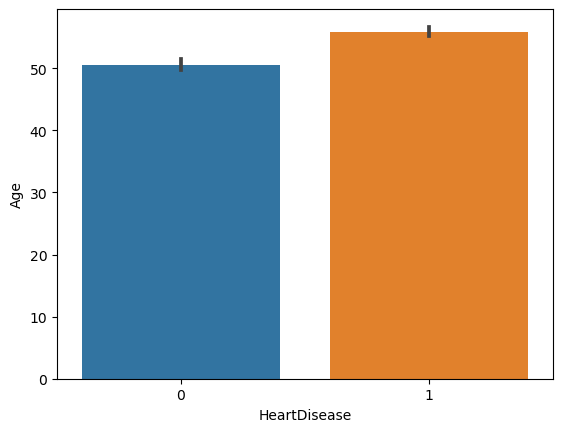

In [18]:
sns.barplot(x = "HeartDisease", y = "Age",data = data)
plt.show()

In [24]:
gb1 = data.groupby("Sex").agg({"Age":"mean","RestingBP":"mean","Cholesterol":"mean","MaxHR":"mean","Oldpeak":"mean","HeartDisease":"mean"})

In [25]:
gb1

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
Sex,,,,,,
F,52.492228,132.212435,241.196891,146.139896,0.668912,0.259067
M,53.782069,132.445517,187.513103,134.325517,0.945517,0.631724


In [30]:
gb1 = pd.DataFrame({"Age":[52.492228,53.782069],"RestingBP":["132.212435",132.445517],"Cholesterol":[241.196891,187.513103],"MaxHR":[146.139896,134.325517],"Oldpeak":[0.668912,0.945517],"HeartDisease":[0.259067,0.631724]},index =["F","M"])

In [39]:
gb1

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
F,52.492228,132.212435,241.196891,146.139896,0.668912,0.259067
M,53.782069,132.445517,187.513103,134.325517,0.945517,0.631724


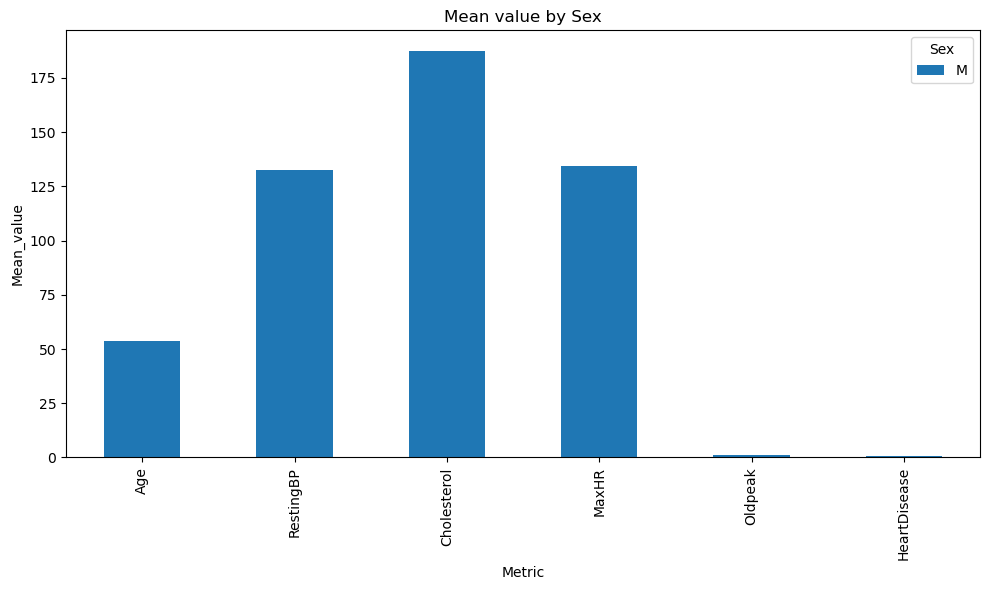

In [40]:
gb1_transposed = gb1.T
ax = gb1_transposed.plot(kind = "bar",figsize = (10,6))
ax.set_title("Mean value by Sex")
ax.set_xlabel("Metric")
ax.set_ylabel("Mean_value")
ax.legend(title = "Sex")
plt.tight_layout()
plt.show()

In [43]:
data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,M,140,289,0,172,0.0,0
1,49,F,160,180,0,156,1.0,1
2,37,M,130,283,0,98,0.0,0
3,48,F,138,214,0,108,1.5,1
4,54,M,150,195,0,122,0.0,0


In [45]:
data["RestingBP"]

0      140
1      160
2      130
3      138
4      150
      ... 
913    110
914    144
915    130
916    130
917    138
Name: RestingBP, Length: 918, dtype: int64

<Axes: xlabel='RestingBP'>

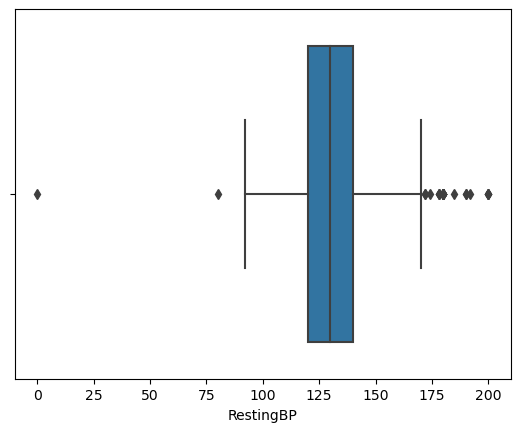

In [47]:
sns.boxplot(x = "RestingBP",data = data)

C:\Users\abc\AppData\Local\Temp\ipykernel_4776\1413059866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["RestingBP"])


<Axes: xlabel='RestingBP', ylabel='Density'>

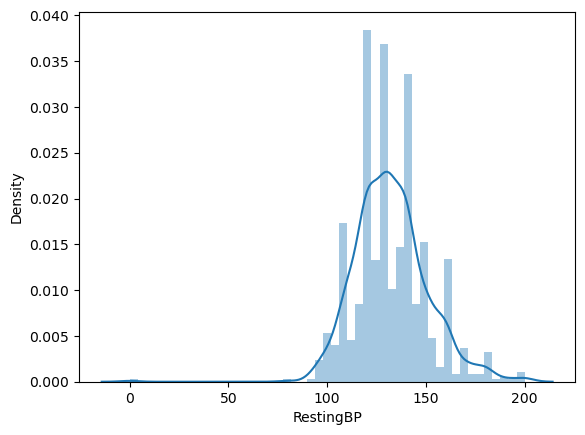

In [50]:
sns.distplot(data["RestingBP"])

In [51]:
percentile = np.percentile(data["RestingBP"],[25,50,75])

In [52]:
percentile

array([120., 130., 140.])

In [53]:
data["RestingBP"].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [55]:
q1 = data["RestingBP"].quantile(.25)
q3 = data["RestingBP"].quantile(.75)

In [56]:
q1,q3

(120.0, 140.0)

In [57]:
IQR =q3-q1
IQR

20.0

In [58]:
lower_limit = q1-1.5*(IQR)
upper_limit = q3 + 1.5*(IQR)
lower_limit,upper_limit

(90.0, 170.0)

In [61]:
data1 =  outlier = data[(data["RestingBP"]<lower_limit)|(data["RestingBP"]>upper_limit)] 

In [63]:
data1["RestingBP"]

109    190
123    180
189    180
190    180
241    200
274    180
275    180
278    180
314     80
365    200
372    185
399    200
411    180
423    180
449      0
475    178
550    172
585    180
592    190
673    174
702    178
725    180
732    200
759    192
774    178
780    180
855    180
880    172
Name: RestingBP, dtype: int64

In [66]:
  data3 = no_outlier = data[(data["RestingBP"]>lower_limit)|(data["RestingBP"]<upper_limit)]

In [67]:
data3

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,M,140,289,0,172,0.0,0
1,49,F,160,180,0,156,1.0,1
2,37,M,130,283,0,98,0.0,0
3,48,F,138,214,0,108,1.5,1
4,54,M,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,132,1.2,1
914,68,M,144,193,1,141,3.4,1
915,57,M,130,131,0,115,1.2,1
916,57,F,130,236,0,174,0.0,1


<Axes: >

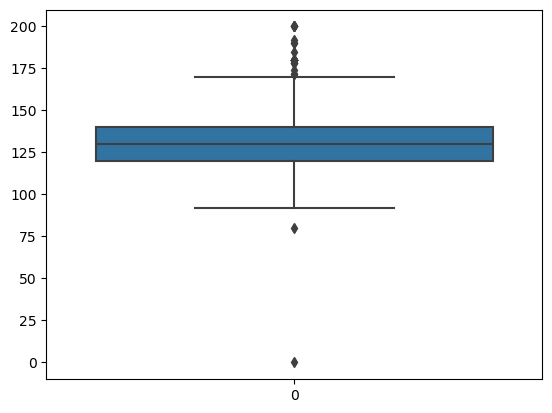

In [68]:
sns.boxplot(data["RestingBP"])

In [69]:
data3["Cholesterol"].head()

0    289
1    180
2    283
3    214
4    195
Name: Cholesterol, dtype: int64

In [70]:
percentile = np.percentile(data3["Cholesterol"],[25,50,75])

In [71]:
percentile

array([173.25, 223.  , 267.  ])

In [72]:
q1 = data3["Cholesterol"].quantile(.25)
q3 = data3["Cholesterol"].quantile(.75)

In [73]:
q3,q1

(267.0, 173.25)

In [74]:
IQR = q3-q1
IQR

93.75

In [75]:
lower_limit = q1 - 1.5*(IQR)
upper_limit = q3 + 1.5*(IQR)
lower_limit,upper_limit

(32.625, 407.625)

In [76]:
 outlier = data[(data["Cholesterol"]<lower_limit)|(data["Cholesterol"]>upper_limit)]

In [94]:
data4 = no_outlier = data[(data["Cholesterol"]>lower_limit)|(data["Cholesterol"]<upper_limit)] 

In [95]:
data4

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,M,140,289,0,172,0.0,0
1,49,F,160,180,0,156,1.0,1
2,37,M,130,283,0,98,0.0,0
3,48,F,138,214,0,108,1.5,1
4,54,M,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,132,1.2,1
914,68,M,144,193,1,141,3.4,1
915,57,M,130,131,0,115,1.2,1
916,57,F,130,236,0,174,0.0,1


In [79]:
data4.shape

(918, 8)

<Axes: >

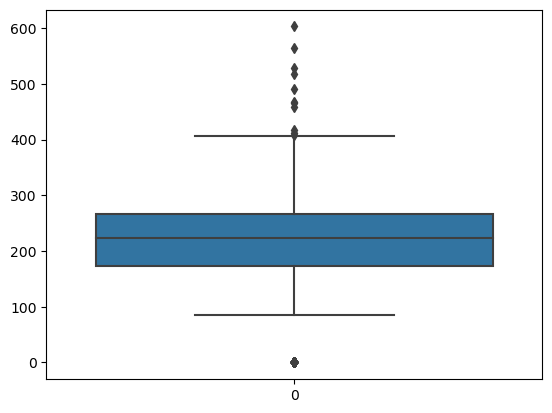

In [80]:
sns.boxplot(data4["Cholesterol"])

In [81]:
data4.MaxHR.mean()

136.80936819172112

In [82]:
data4.MaxHR.std()

25.460334138250293

In [83]:
data4["z_score"] = (data4.MaxHR-data4.MaxHR.mean())/df.MaxHR.std()

In [84]:
data4.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,z_score
0,40,M,140,289,0,172,0.0,0,1.382175
1,49,F,160,180,0,156,1.0,1,0.753746
2,37,M,130,283,0,98,0.0,0,-1.524307
3,48,F,138,214,0,108,1.5,1,-1.131539
4,54,M,150,195,0,122,0.0,0,-0.581664


In [87]:
data4[data4["z_score"]<3]

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,z_score
0,40,M,140,289,0,172,0.0,0,1.382175
1,49,F,160,180,0,156,1.0,1,0.753746
2,37,M,130,283,0,98,0.0,0,-1.524307
3,48,F,138,214,0,108,1.5,1,-1.131539
4,54,M,150,195,0,122,0.0,0,-0.581664
...,...,...,...,...,...,...,...,...,...
913,45,M,110,264,0,132,1.2,1,-0.188897
914,68,M,144,193,1,141,3.4,1,0.164595
915,57,M,130,131,0,115,1.2,1,-0.856602
916,57,F,130,236,0,174,0.0,1,1.460728


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,z_score
0,40,M,140,289,0,172,0.0,0,1.382175
1,49,F,160,180,0,156,1.0,1,0.753746
2,37,M,130,283,0,98,0.0,0,-1.524307
3,48,F,138,214,0,108,1.5,1,-1.131539
4,54,M,150,195,0,122,0.0,0,-0.581664


In [98]:
data4.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,M,140,289,0,172,0.0,0
1,49,F,160,180,0,156,1.0,1
2,37,M,130,283,0,98,0.0,0
3,48,F,138,214,0,108,1.5,1
4,54,M,150,195,0,122,0.0,0


In [101]:
percentile = np.percentile(data4["MaxHR"],[25,50,75])

In [102]:
percentile

array([120., 138., 156.])

In [103]:
q1 = data4["MaxHR"].quantile(.25)
q3 = data4["MaxHR"].quantile(.75)

In [104]:
q3,q1

(156.0, 120.0)

In [106]:
IQR = q3-q1
IQR

36.0

In [107]:
lower_limit = q1-1.5*(IQR)
upper_limit = q3 +1.5*(IQR)
lower_limit,upper_limit

(66.0, 210.0)

In [108]:
outlier = data4[(data4["MaxHR"]<lower_limit)|(data4["MaxHR"]>upper_limit)]

In [140]:
 data5 = no_outlier =data4[(data4["MaxHR"]>lower_limit)|(data4["MaxHR"]<upper_limit)] 

In [141]:
data5.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,M,140,289,0,172,0.0,0
1,49,F,160,180,0,156,1.0,1
2,37,M,130,283,0,98,0.0,0
3,48,F,138,214,0,108,1.5,1
4,54,M,150,195,0,122,0.0,0


<Axes: >

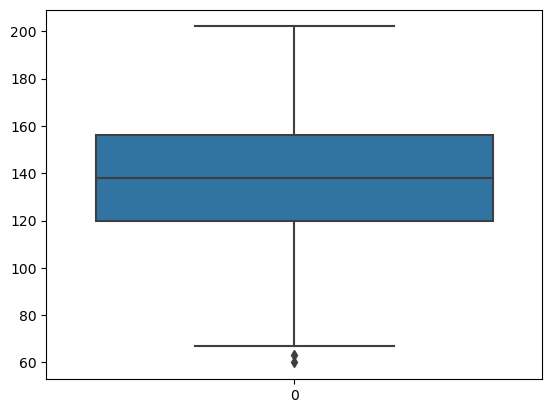

In [111]:
sns.boxplot(data5["MaxHR"])

In [113]:
data5.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,M,140,289,0,172,0.0,0
1,49,F,160,180,0,156,1.0,1
2,37,M,130,283,0,98,0.0,0
3,48,F,138,214,0,108,1.5,1
4,54,M,150,195,0,122,0.0,0


In [115]:
dummies = pd.get_dummies(df.Sex)

In [116]:
dummies

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
913,0,1
914,0,1
915,0,1
916,1,0


In [117]:
merged = pd.concat([data5,dummies],axis = 1)

In [118]:
merged.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M
0,40,M,140,289,0,172,0.0,0,0,1
1,49,F,160,180,0,156,1.0,1,1,0
2,37,M,130,283,0,98,0.0,0,0,1
3,48,F,138,214,0,108,1.5,1,1,0
4,54,M,150,195,0,122,0.0,0,0,1


In [119]:
dataset = merged.drop(["Sex","F"],axis = 1)

In [120]:
dataset

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M
0,40,140,289,0,172,0.0,0,1
1,49,160,180,0,156,1.0,1,0
2,37,130,283,0,98,0.0,0,1
3,48,138,214,0,108,1.5,1,0
4,54,150,195,0,122,0.0,0,1
...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1
914,68,144,193,1,141,3.4,1,1
915,57,130,131,0,115,1.2,1,1
916,57,130,236,0,174,0.0,1,0


In [121]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [122]:
x = dataset.drop(["Age"],axis =1)

In [123]:
y = dataset["Age"]

In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 2)

In [125]:
lr = model.fit(x_train,y_train)

In [126]:
lr

LinearRegression()

In [127]:
accuracy = model.score(x_test,y_test)

In [128]:
accuracy

0.1909298993861559

In [130]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [131]:
log = model.fit(x_train,y_train)
log

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
accuracy1 = model.score(x_test,y_test)

In [133]:
accuracy1

0.04891304347826087

In [144]:
data5.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,M,140,289,0,172,0.0,0
1,49,F,160,180,0,156,1.0,1
2,37,M,130,283,0,98,0.0,0
3,48,F,138,214,0,108,1.5,1
4,54,M,150,195,0,122,0.0,0


In [147]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = data5
dfle.Sex = le.fit_transform(dfle.Sex)

In [149]:
dfle

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,1,140,289,0,172,0.0,0
1,49,0,160,180,0,156,1.0,1
2,37,1,130,283,0,98,0.0,0
3,48,0,138,214,0,108,1.5,1
4,54,1,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1.2,1
914,68,1,144,193,1,141,3.4,1
915,57,1,130,131,0,115,1.2,1
916,57,0,130,236,0,174,0.0,1


In [150]:
x = dfle.drop(["Sex"],axis = 1)

In [151]:
y = dfle["Sex"]

In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 2)

In [157]:
from sklearn.linear_model import LogisticRegression
model  = LogisticRegression(max_iter = 1000)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)

In [158]:
log = model.fit(x_train,y_train)

In [159]:
log

LogisticRegression(max_iter=1000)

In [160]:
score = model.score(x_test,y_test)

In [161]:
score

0.8097826086956522